# KPIs - Challenges

Analyze the content of the Muesli Dataset again. Think about KPIs that would be useful for tracking the delivery processes.   
Think about their definitions, the reasoning behind your choice and how to calculate them. 

### 1. Merge all datasets together 
- pay attention which columns need to be parsed as datetime
- compare column names of all datasets, consider cleaning them
- when merging - you need to make sure you are merging **ON** the right column or multiple columns
- check if there are duplicated rows (all values same as in another row!), drop these duplicates

### 2. Create 3 KPI for delivery processes as columns:

1. **Order To Truck Time** (order date - on truck scan date)
2. **Processing time** (order date - ready to ship date)
3. **Waiting time** (ready to ship date - on truck scan date)
4. (optional) add KPIs of your choice

### 3. perform EDA

- plot distribution of "order to truck time" split by ship mode
- plot distribution of "processing days" split by  ship mode
- plot distribution of "waiting time" split by  ship mode
- ...

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns

# 1. Merge all datasets together

### Firstly, import / read and parse dates in each dataset 

In [2]:
### ORDERS

df_orders = pd.read_csv('../data/muesli_orders.csv', index_col=0, header=1, parse_dates=['Order Date'], dayfirst=True)

df_orders.columns = df_orders.columns.str.lower()

df_orders.rename(columns={'order id':'order_id',
                          'order date':'order_date',
                          'ship mode' : 'ship_mode',
                          'customer id' : 'customer_id',
                          'customer name' : 'customer_name',
                          'origin channel' : 'origin_channel',
                          'postal code' : 'postal_code',
                          'sub-category' : 'sub_category', 
                          'product id' : 'product_id'
                         },inplace=True)

In [3]:
df_orders.dtypes

order_id                  object
order_date        datetime64[ns]
ship_mode                 object
customer_id               object
customer_name             object
origin_channel            object
country/region            object
city                      object
state                     object
postal_code              float64
region                    object
category                  object
sub_category              object
product_id                object
sales                    float64
quantity                   int64
discount                 float64
profit                   float64
dtype: object

In [4]:
df_orders.shape

(9994, 18)

In [5]:
### ARRIVALS

df_arrivals = pd.read_csv('../data/muesli_campaign_data.csv', parse_dates=['Arrival Scan Date'], dayfirst=True)

df_arrivals.columns = df_arrivals.columns.str.lower()

df_arrivals.rename(columns={'order id':'order_id',
                          'arrival scan date':'arrival_scan_date',
                          'customer name' : 'customer_name'
                         },inplace=True)

In [6]:
df_arrivals.dtypes

order_id                     object
arrival_scan_date    datetime64[ns]
customer_name                object
dtype: object

In [7]:
df_arrivals.shape

(333, 3)

In [8]:
### READY TO SHIP

df_rdy2shp = pd.read_csv('../data/muesli_Intern_data_study.csv', parse_dates=['Ready to Ship Date','Pickup Date'], dayfirst=True)
df_rdy2shp.head()

,Order ID,Ready to Ship Date,Pickup Date
0,CA-2019-116540,2019-09-02,2019-09-03
1,CA-2019-116540,2019-09-02,2019-09-03
2,CA-2019-129847,2019-09-04,2019-09-04
3,CA-2019-129630,2019-09-04,2019-09-04
4,CA-2019-106278,2019-09-05,2019-09-06


In [9]:
df_rdy2shp.columns = df_rdy2shp.columns.str.lower()

df_rdy2shp.rename(columns={'order id':'order_id',
                          'ready to ship date':'rdy2ship_date',
                          'pickup date' : 'pickup_date'
                         },inplace=True)

df_rdy2shp.head()

,order_id,rdy2ship_date,pickup_date
0,CA-2019-116540,2019-09-02,2019-09-03
1,CA-2019-116540,2019-09-02,2019-09-03
2,CA-2019-129847,2019-09-04,2019-09-04
3,CA-2019-129630,2019-09-04,2019-09-04
4,CA-2019-106278,2019-09-05,2019-09-06


In [10]:
df_rdy2shp.dtypes

order_id                 object
rdy2ship_date    datetime64[ns]
pickup_date      datetime64[ns]
dtype: object

In [11]:
df_rdy2shp.shape

(290, 3)

In [12]:
### PROCESS

df_process = pd.read_csv('../data/muesli_order_process_data.csv',index_col=0, parse_dates=['Order Date','On Truck Scan Date'], dayfirst=True)
df_process.head()

,Order ID,Order Date,On Truck Scan Date,Ship Mode
Row ID,,,,
3074,CA-2019-125206,2019-01-03,2019-01-07,Express
4919,CA-2019-160304,2019-01-02,2019-01-09,Standard Processing
4920,CA-2019-160304,2019-01-02,2019-01-09,Standard Processing
8604,US-2019-116365,2019-01-03,2019-01-09,Standard Processing
8605,US-2019-116365,2019-01-03,2019-01-09,Standard Processing


In [13]:
df_process.columns = df_process.columns.str.lower()

df_process.rename(columns={'order id':'order_id',
                           'order date':'order_date',
                          'on truck scan date':'on_truck_scan_date',
                          'ship mode' : 'processing_mode'
                         },inplace=True)

df_process.head()

,order_id,order_date,on_truck_scan_date,processing_mode
Row ID,,,,
3074,CA-2019-125206,2019-01-03,2019-01-07,Express
4919,CA-2019-160304,2019-01-02,2019-01-09,Standard Processing
4920,CA-2019-160304,2019-01-02,2019-01-09,Standard Processing
8604,US-2019-116365,2019-01-03,2019-01-09,Standard Processing
8605,US-2019-116365,2019-01-03,2019-01-09,Standard Processing


In [14]:
df_process.dtypes

order_id                      object
order_date            datetime64[ns]
on_truck_scan_date    datetime64[ns]
processing_mode               object
dtype: object

In [15]:
df_process.shape

(5899, 4)

### Secondly, merge all of the DataFrames
... you need to make sure you are merging ON the right column or multiple columns

Our DataFrames are:
+ df_orders (9994, 18)
+ df_process (5899, 4)
+ df_arrivals (333, 3)
+ df_rdy2shp (290, 3)

In [16]:
df_rdy2shp.head()

,order_id,rdy2ship_date,pickup_date
0,CA-2019-116540,2019-09-02,2019-09-03
1,CA-2019-116540,2019-09-02,2019-09-03
2,CA-2019-129847,2019-09-04,2019-09-04
3,CA-2019-129630,2019-09-04,2019-09-04
4,CA-2019-106278,2019-09-05,2019-09-06


In [17]:
df_process.head()

,order_id,order_date,on_truck_scan_date,processing_mode
Row ID,,,,
3074,CA-2019-125206,2019-01-03,2019-01-07,Express
4919,CA-2019-160304,2019-01-02,2019-01-09,Standard Processing
4920,CA-2019-160304,2019-01-02,2019-01-09,Standard Processing
8604,US-2019-116365,2019-01-03,2019-01-09,Standard Processing
8605,US-2019-116365,2019-01-03,2019-01-09,Standard Processing


In [18]:
df_orders[df_orders['order_id']==('CA-2018-126725')]

,order_id,order_date,ship_mode,customer_id,customer_name,origin_channel,country/region,city,state,postal_code,region,category,sub_category,product_id,sales,quantity,discount,profit
Index,,,,,,,,,,,,,,,,,,
5846,CA-2018-126725,2018-11-17,Standard Class,BS-11665,Brian Stugart,Email,United States,San Diego,California,92105.0,West,Power Muesli,Nuts and more,OFF-PA-10001639,32.400,5,0.0,15.5520
5842,CA-2018-126725,2018-11-17,Standard Class,BS-11665,Brian Stugart,Email,United States,San Diego,California,92105.0,West,Special Projects Muesil,Only Oats,TEC-PH-10003174,415.968,4,0.2,51.9960
5843,CA-2018-126725,2018-11-17,Standard Class,BS-11665,Brian Stugart,Email,United States,San Diego,California,92105.0,West,Power Muesli,Steel Cut,OFF-ST-10001418,304.900,5,0.0,6.0980
5845,CA-2018-126725,2018-11-17,Standard Class,BS-11665,Brian Stugart,Email,United States,San Diego,California,92105.0,West,Power Muesli,Steel Cut,OFF-ST-10000129,777.210,7,0.0,54.4047
5844,CA-2018-126725,2018-11-17,Standard Class,BS-11665,Brian Stugart,Email,United States,San Diego,California,92105.0,West,Toasted Muesli,With Fruit and Nuts,FUR-FU-10002813,80.960,4,0.0,29.1456
5848,CA-2018-126725,2018-11-17,Standard Class,BS-11665,Brian Stugart,Email,United States,San Diego,California,92105.0,West,Toasted Muesli,With Fruit and Nuts,FUR-FU-10001591,36.600,3,0.0,15.3720
5847,CA-2018-126725,2018-11-17,Standard Class,BS-11665,Brian Stugart,Email,United States,San Diego,California,92105.0,West,Toasted Muesli,With Nuts,FUR-CH-10001708,225.568,2,0.2,2.8196


In [19]:
# merging process & rdy2ship DF's

process_ship = df_process.merge(df_rdy2shp, how='outer', on='order_id')

In [20]:
process_ship[process_ship['order_id']==('CA-2019-116540')]

,order_id,order_date,on_truck_scan_date,processing_mode,rdy2ship_date,pickup_date
1260,CA-2019-116540,2019-09-02,2019-09-03,Express,2019-09-02,2019-09-03
1261,CA-2019-116540,2019-09-02,2019-09-03,Express,2019-09-02,2019-09-03
1262,CA-2019-116540,2019-09-02,2019-09-03,Express,2019-09-02,2019-09-03
1263,CA-2019-116540,2019-09-02,2019-09-03,Express,2019-09-02,2019-09-03


In [21]:
process_ship.head()

,order_id,order_date,on_truck_scan_date,processing_mode,rdy2ship_date,pickup_date
0,CA-2019-125206,2019-01-03,2019-01-07,Express,NaT,NaT
1,CA-2019-160304,2019-01-02,2019-01-09,Standard Processing,NaT,NaT
2,CA-2019-160304,2019-01-02,2019-01-09,Standard Processing,NaT,NaT
3,US-2019-116365,2019-01-03,2019-01-09,Standard Processing,NaT,NaT
4,US-2019-116365,2019-01-03,2019-01-09,Standard Processing,NaT,NaT


In [22]:
process_ship.shape

(6234, 6)

In [23]:
df_arrivals.head()

,order_id,arrival_scan_date,customer_name
0,CA-2019-109666,2019-05-03,Kunst Miller
1,CA-2019-138933,2019-05-03,Jack Lebron
2,CA-2019-130001,2019-05-03,Heather Kirkland
3,CA-2019-113061,2019-05-06,Ed Ludwig
4,CA-2019-162138,2019-05-06,Grace Kelly


In [24]:
process_ship.isnull().sum()

order_id                 0
order_date               0
on_truck_scan_date       0
processing_mode          0
rdy2ship_date         5481
pickup_date           5481
dtype: int64

In [25]:
# merging process, rdy2ship & arrivals DFs

pro_ship_arr = process_ship.merge(df_arrivals, how='outer', on='order_id')

In [26]:
pro_ship_arr.head()

,order_id,order_date,on_truck_scan_date,processing_mode,rdy2ship_date,pickup_date,arrival_scan_date,customer_name
0,CA-2019-125206,2019-01-03,2019-01-07,Express,NaT,NaT,NaT,NaN
1,CA-2019-160304,2019-01-02,2019-01-09,Standard Processing,NaT,NaT,NaT,NaN
2,CA-2019-160304,2019-01-02,2019-01-09,Standard Processing,NaT,NaT,NaT,NaN
3,US-2019-116365,2019-01-03,2019-01-09,Standard Processing,NaT,NaT,NaT,NaN
4,US-2019-116365,2019-01-03,2019-01-09,Standard Processing,NaT,NaT,NaT,NaN


In [27]:
pro_ship_arr.isnull().sum()

order_id                 0
order_date               0
on_truck_scan_date       0
processing_mode          0
rdy2ship_date         5481
pickup_date           5481
arrival_scan_date     5523
customer_name         5523
dtype: int64

In [28]:
pro_ship_arr.columns

Index(['order_id', 'order_date', 'on_truck_scan_date', 'processing_mode',
       'rdy2ship_date', 'pickup_date', 'arrival_scan_date', 'customer_name'],
      dtype='object')

In [29]:
pro_ship_arr.shape

(6234, 8)

In [30]:
df_orders.columns

Index(['order_id', 'order_date', 'ship_mode', 'customer_id', 'customer_name',
       'origin_channel', 'country/region', 'city', 'state', 'postal_code',
       'region', 'category', 'sub_category', 'product_id', 'sales', 'quantity',
       'discount', 'profit'],
      dtype='object')

In [31]:
df_orders.shape

(9994, 18)

In [32]:
## merge all data

all_merged = df_orders.merge(pro_ship_arr, how='outer', on=['order_id', 'order_date'])

In [33]:
all_merged.shape

(23171, 24)

In [ ]:
#, 'order_date'  # (23171, 24) ... same num of rows but one fewer column when merged on order id + date

In [ ]:
### run checks on an order ID to check that it has worked

In [34]:
all_merged[all_merged['order_id']==('CA-2019-113061')]

,order_id,order_date,ship_mode,customer_id,customer_name_x,origin_channel,country/region,city,state,postal_code,...,sales,quantity,discount,profit,on_truck_scan_date,processing_mode,rdy2ship_date,pickup_date,arrival_scan_date,customer_name_y
22641,CA-2019-113061,2019-04-22,Standard Class,EL-13735,Ed Ludwig,Facebook,United States,Jefferson City,Missouri,65109.0,...,86.62,2,0.0,8.662,2019-04-29,Standard Processing,NaT,NaT,2019-05-06,Ed Ludwig


In [35]:
df_orders[df_orders['order_id']==('CA-2019-113061')]

,order_id,order_date,ship_mode,customer_id,customer_name,origin_channel,country/region,city,state,postal_code,region,category,sub_category,product_id,sales,quantity,discount,profit
Index,,,,,,,,,,,,,,,,,,
1037,CA-2019-113061,2019-04-22,Standard Class,EL-13735,Ed Ludwig,Facebook,United States,Jefferson City,Missouri,65109.0,Central,Toasted Muesli,With Fruit and Nuts,FUR-FU-10003975,86.62,2,0.0,8.662


In [36]:
pro_ship_arr[pro_ship_arr['order_id']==('CA-2019-113061')]

,order_id,order_date,on_truck_scan_date,processing_mode,rdy2ship_date,pickup_date,arrival_scan_date,customer_name
472,CA-2019-113061,2019-04-22,2019-04-29,Standard Processing,NaT,NaT,2019-05-06,Ed Ludwig


In [37]:
process_ship[process_ship['order_id']==('CA-2019-113061')]

,order_id,order_date,on_truck_scan_date,processing_mode,rdy2ship_date,pickup_date
472,CA-2019-113061,2019-04-22,2019-04-29,Standard Processing,NaT,NaT


In [38]:
df_rdy2shp[df_rdy2shp['order_id']==('CA-2019-113061')]

,order_id,rdy2ship_date,pickup_date


In [39]:
df_process[df_process['order_id']==('CA-2019-113061')]

,order_id,order_date,on_truck_scan_date,processing_mode
Row ID,,,,
1037,CA-2019-113061,2019-04-22,2019-04-29,Standard Processing


In [ ]:
#### rearrange columns to a more logical order, also dropping the second customer name column

In [40]:
all_merged.columns

Index(['order_id', 'order_date', 'ship_mode', 'customer_id', 'customer_name_x',
       'origin_channel', 'country/region', 'city', 'state', 'postal_code',
       'region', 'category', 'sub_category', 'product_id', 'sales', 'quantity',
       'discount', 'profit', 'on_truck_scan_date', 'processing_mode',
       'rdy2ship_date', 'pickup_date', 'arrival_scan_date', 'customer_name_y'],
      dtype='object')

In [41]:
all_rearranged = all_merged[['order_id', 'order_date', 'ship_mode', 'processing_mode', 'rdy2ship_date', 
                             'pickup_date', 'customer_id', 'customer_name_x',
                             'on_truck_scan_date','arrival_scan_date',
                             'origin_channel', 'country/region', 'city', 'state', 'postal_code','region', 
                             'category', 'sub_category', 'product_id', 'sales', 
                             'quantity','discount', 'profit']]

In [42]:
all_rearranged.rename(columns={'customer_name_x':'customer_name'},inplace=True)

/var/folders/zf/w4lxv8m15z9442k97fpp97ch0000gn/T/ipykernel_84879/2335415993.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_rearranged.rename(columns={'customer_name_x':'customer_name'},inplace=True)


In [43]:
all_rearranged[all_rearranged['order_date']==('2019-08-18')]

,order_id,order_date,ship_mode,processing_mode,rdy2ship_date,pickup_date,customer_id,customer_name,on_truck_scan_date,arrival_scan_date,...,state,postal_code,region,category,sub_category,product_id,sales,quantity,discount,profit
9835,CA-2019-136133,2019-08-18,Second Class,Standard Processing,NaT,NaT,HW-14935,Helen Wasserman,2019-08-28,NaT,...,New York,10024.0,East,Power Muesli,Mega Protein,OFF-AP-10000576,355.320,9,0.0,99.4896
15864,CA-2019-113551,2019-08-18,First Class,Express,NaT,NaT,NF-18385,Natalie Fritzler,2019-08-21,NaT,...,Texas,78539.0,Central,Power Muesli,Nuts and more,OFF-PA-10004665,83.840,8,0.2,30.3920
15865,CA-2019-113551,2019-08-18,First Class,Express,NaT,NaT,NF-18385,Natalie Fritzler,2019-08-21,NaT,...,Texas,78539.0,Central,Power Muesli,Nuts and more,OFF-PA-10004665,83.840,8,0.2,30.3920
15866,CA-2019-113551,2019-08-18,First Class,Express,NaT,NaT,NF-18385,Natalie Fritzler,2019-08-21,NaT,...,Texas,78539.0,Central,Power Muesli,Super Fibre Boost,OFF-BI-10001617,2.068,1,0.8,-3.4122
15867,CA-2019-113551,2019-08-18,First Class,Express,NaT,NaT,NF-18385,Natalie Fritzler,2019-08-21,NaT,...,Texas,78539.0,Central,Power Muesli,Super Fibre Boost,OFF-BI-10001617,2.068,1,0.8,-3.4122
18074,CA-2019-153353,2019-08-18,Standard Class,Standard Processing,NaT,NaT,GG-14650,Greg Guthrie,2019-08-28,NaT,...,New York,10035.0,East,Special Projects Muesil,Only Oats,TEC-PH-10000439,39.990,1,0.0,11.5971
22933,CA-2019-128916,2019-08-18,Second Class,Standard Processing,NaT,NaT,MA-17560,Matt Abelman,2019-08-23,NaT,...,Texas,77070.0,Central,Toasted Muesli,With Fruit and Nuts,FUR-FU-10001940,9.552,3,0.6,-3.8208
22934,CA-2019-128916,2019-08-18,Second Class,Standard Processing,NaT,NaT,MA-17560,Matt Abelman,2019-08-23,NaT,...,Texas,77070.0,Central,Toasted Muesli,With Fruit and Nuts,FUR-FU-10001940,9.552,3,0.6,-3.8208
22935,CA-2019-128916,2019-08-18,Second Class,Standard Processing,NaT,NaT,MA-17560,Matt Abelman,2019-08-23,NaT,...,Texas,77070.0,Central,Toasted Muesli,With Fruit and Nuts,FUR-FU-10000320,5.344,4,0.6,-2.1376
22936,CA-2019-128916,2019-08-18,Second Class,Standard Processing,NaT,NaT,MA-17560,Matt Abelman,2019-08-23,NaT,...,Texas,77070.0,Central,Toasted Muesli,With Fruit and Nuts,FUR-FU-10000320,5.344,4,0.6,-2.1376


In [44]:
all_rearranged.shape

(23171, 23)

In [45]:
all_rearranged.isnull().sum()

order_id                  0
order_date                0
ship_mode                 0
processing_mode        4095
rdy2ship_date         20400
pickup_date           20400
customer_id               0
customer_name             0
on_truck_scan_date     4095
arrival_scan_date     20960
origin_channel            0
country/region            0
city                      0
state                     0
postal_code              29
region                    0
category                  0
sub_category              0
product_id                0
sales                     0
quantity                  0
discount                  0
profit                    0
dtype: int64

### Thirdly, check for duplicates and delete where needed
... check if there are duplicated rows (all values same as in another row!), drop these duplicates

In [46]:
all_rearranged[all_rearranged.duplicated()].shape

(13176, 23)

In [47]:
23171-13176

9995

In [48]:
all_data = all_rearranged.drop_duplicates()

In [49]:
all_data.shape

(9995, 23)

In [50]:
all_data.head()

,order_id,order_date,ship_mode,processing_mode,rdy2ship_date,pickup_date,customer_id,customer_name,on_truck_scan_date,arrival_scan_date,...,state,postal_code,region,category,sub_category,product_id,sales,quantity,discount,profit
0,CA-2019-121755,2019-01-16,Second Class,Standard Processing,NaT,NaT,EH-13945,Eric Hoffmann,2019-01-23,NaT,...,California,90049.0,West,Special Projects Muesil,Gluten Free,TEC-AC-10003027,90.570,3,0.0,11.7741
2,CA-2019-121755,2019-01-16,Second Class,Standard Processing,NaT,NaT,EH-13945,Eric Hoffmann,2019-01-23,NaT,...,California,90049.0,West,Power Muesli,Super Fibre Boost,OFF-BI-10001634,11.648,2,0.2,4.2224
4,CA-2019-118255,2019-03-11,First Class,Express,NaT,NaT,ON-18715,Odella Nelson,2019-03-13,NaT,...,Minnesota,55122.0,Central,Special Projects Muesil,Gluten Free,TEC-AC-10000171,45.980,2,0.0,19.7714
6,CA-2019-118255,2019-03-11,First Class,Express,NaT,NaT,ON-18715,Odella Nelson,2019-03-13,NaT,...,Minnesota,55122.0,Central,Power Muesli,Super Fibre Boost,OFF-BI-10003291,17.460,2,0.0,8.2062
8,CA-2019-169194,2019-06-20,Standard Class,Standard Processing,NaT,NaT,LH-16900,Lena Hernandez,2019-06-26,NaT,...,Delaware,19901.0,East,Special Projects Muesil,Gluten Free,TEC-AC-10002167,45.000,3,0.0,4.9500


In [51]:
all_data[(all_data['rdy2ship_date'].notnull())].sample(20)

,order_id,order_date,ship_mode,processing_mode,rdy2ship_date,pickup_date,customer_id,customer_name,on_truck_scan_date,arrival_scan_date,...,state,postal_code,region,category,sub_category,product_id,sales,quantity,discount,profit
21405,CA-2020-131254,2020-11-19,First Class,Express,2020-11-23,2020-11-23,NC-18415,Nathan Cano,2020-11-23,NaT,...,Texas,77095.0,Central,Toasted Muesli,With Nuts,FUR-CH-10003774,191.058,3,0.3,-46.3998
17192,CA-2020-102925,2020-11-05,Second Class,Standard Processing,2020-11-10,2020-11-12,CD-12280,Christina DeMoss,2020-11-12,NaT,...,New York,10024.0,East,Power Muesli,Super Fibre Boost,OFF-BI-10002706,11.424,1,0.2,3.7128
10373,CA-2020-167941,2020-11-06,Second Class,Standard Processing,2020-11-09,2020-11-12,JF-15565,Jill Fjeld,2020-11-12,NaT,...,North Carolina,28314.0,South,Toasted Muesli,With Fruit and Nuts,FUR-FU-10004671,28.272,2,0.2,6.3612
14058,US-2019-118780,2019-09-10,Second Class,Standard Processing,2019-09-16,2019-09-18,PN-18775,Parhena Norris,2019-09-18,2019-09-23,...,New York,10011.0,East,Power Muesli,Nuts and more,OFF-PA-10000575,6.690,1,0.0,3.0774
9317,CA-2020-149944,2020-11-12,Second Class,Standard Processing,2020-11-16,2020-11-18,MB-17305,Maria Bertelson,2020-11-18,NaT,...,Washington,98632.0,West,Power Muesli,Mega Protein,OFF-AP-10004708,76.120,2,0.0,22.0748
20286,CA-2019-108875,2019-09-24,Standard Class,Standard Processing,2019-10-01,2019-10-02,CL-12700,Craig Leslie,2019-10-02,NaT,...,Colorado,80013.0,West,Toasted Muesli,With Fruit and Nuts,FUR-FU-10002671,21.440,2,0.2,7.5040
20355,CA-2019-131205,2019-09-04,Standard Class,Standard Processing,2019-09-09,2019-09-11,AA-10645,Anna Andreadi,2019-09-11,NaT,...,Kentucky,40324.0,South,Power Muesli,Super Mega Protein,OFF-AR-10003469,5.280,3,0.0,2.5344
9315,CA-2020-149944,2020-11-12,Second Class,Standard Processing,2020-11-16,2020-11-18,MB-17305,Maria Bertelson,2020-11-18,NaT,...,Washington,98632.0,West,Power Muesli,Maple Sweetened,OFF-FA-10003495,18.240,3,0.0,9.1200
22731,CA-2020-161739,2020-11-10,Second Class,Standard Processing,2020-11-16,2020-11-18,EB-13750,Edward Becker,2020-11-18,NaT,...,Texas,78664.0,Central,Toasted Muesli,With Fruit and Nuts,FUR-FU-10001468,341.960,5,0.6,-427.4500
12653,CA-2020-119746,2020-11-23,Standard Class,Standard Processing,2020-11-27,2020-11-30,CM-12385,Christopher Martinez,2020-11-30,NaT,...,Illinois,60610.0,Central,Special Projects Muesil,Only Oats,TEC-PH-10004447,222.384,2,0.2,16.6788


In [100]:
all_data.to_csv('../data/merged_muesli.csv', index=False)

### 2. Create 3 KPI for delivery processes as columns:
+ Order To Truck Time (order date - on truck scan date)
+ Processing time (order date - ready to ship date)
+ Waiting time (ready to ship date - on truck scan date)
+ (optional) add KPIs of your choice

In [53]:
## Order To Truck Time (order date - on truck scan date)

all_data['order_to_truck_time'] = (all_data['on_truck_scan_date'] - all_data['order_date']).dt.days
all_data

/var/folders/zf/w4lxv8m15z9442k97fpp97ch0000gn/T/ipykernel_84879/382554646.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_data['order_to_truck_time'] = (all_data['on_truck_scan_date'] - all_data['order_date']).dt.days


,order_id,order_date,ship_mode,processing_mode,rdy2ship_date,pickup_date,customer_id,customer_name,on_truck_scan_date,arrival_scan_date,...,postal_code,region,category,sub_category,product_id,sales,quantity,discount,profit,order_to_truck_time
0,CA-2019-121755,2019-01-16,Second Class,Standard Processing,NaT,NaT,EH-13945,Eric Hoffmann,2019-01-23,NaT,...,90049.0,West,Special Projects Muesil,Gluten Free,TEC-AC-10003027,90.570,3,0.0,11.7741,7.0
2,CA-2019-121755,2019-01-16,Second Class,Standard Processing,NaT,NaT,EH-13945,Eric Hoffmann,2019-01-23,NaT,...,90049.0,West,Power Muesli,Super Fibre Boost,OFF-BI-10001634,11.648,2,0.2,4.2224,7.0
4,CA-2019-118255,2019-03-11,First Class,Express,NaT,NaT,ON-18715,Odella Nelson,2019-03-13,NaT,...,55122.0,Central,Special Projects Muesil,Gluten Free,TEC-AC-10000171,45.980,2,0.0,19.7714,2.0
6,CA-2019-118255,2019-03-11,First Class,Express,NaT,NaT,ON-18715,Odella Nelson,2019-03-13,NaT,...,55122.0,Central,Power Muesli,Super Fibre Boost,OFF-BI-10003291,17.460,2,0.0,8.2062,2.0
8,CA-2019-169194,2019-06-20,Standard Class,Standard Processing,NaT,NaT,LH-16900,Lena Hernandez,2019-06-26,NaT,...,19901.0,East,Special Projects Muesil,Gluten Free,TEC-AC-10002167,45.000,3,0.0,4.9500,6.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23166,CA-2019-146913,2019-10-31,Standard Class,Standard Processing,NaT,NaT,SF-20965,Sylvia Foulston,2019-11-06,2019-11-11,...,94109.0,West,Toasted Muesli,With Nuts,FUR-CH-10001854,1403.920,5,0.2,70.1960,6.0
23167,US-2017-114377,2017-11-05,First Class,NaN,NaT,NaT,BG-11035,Barry Gonzalez,NaT,NaT,...,23666.0,South,Toasted Muesli,With Nuts,FUR-CH-10004754,149.900,5,0.0,40.4730,NaN
23168,CA-2020-107209,2020-07-27,Second Class,Standard Processing,NaT,NaT,JW-15955,Joni Wasserman,2020-08-05,NaT,...,27604.0,South,Toasted Muesli,With Nuts,FUR-CH-10001146,194.848,4,0.2,12.1780,9.0
23169,US-2020-152842,2020-07-16,Standard Class,Standard Processing,NaT,NaT,NF-18385,Natalie Fritzler,2020-07-24,NaT,...,28205.0,South,Toasted Muesli,With Nuts,FUR-CH-10004218,242.352,3,0.2,15.1470,8.0


In [54]:
all_data.rename(columns={'Order To Truck Time':'order_to_truck_time'},inplace=True)


/var/folders/zf/w4lxv8m15z9442k97fpp97ch0000gn/T/ipykernel_84879/652132898.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_data.rename(columns={'Order To Truck Time':'order_to_truck_time'},inplace=True)


In [55]:
## Processing time (order date - ready to ship date)

all_data['processing_time'] = (all_data['rdy2ship_date'] - all_data['order_date']).dt.days
all_data[(all_data['processing_time'].notnull())]

/var/folders/zf/w4lxv8m15z9442k97fpp97ch0000gn/T/ipykernel_84879/1219048888.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_data['processing_time'] = (all_data['rdy2ship_date'] - all_data['order_date']).dt.days


,order_id,order_date,ship_mode,processing_mode,rdy2ship_date,pickup_date,customer_id,customer_name,on_truck_scan_date,arrival_scan_date,...,region,category,sub_category,product_id,sales,quantity,discount,profit,order_to_truck_time,processing_time
81,CA-2020-119004,2020-11-23,Standard Class,Standard Processing,2020-11-30,2020-12-02,JM-15250,Janet Martin,2020-12-02,NaT,...,South,Special Projects Muesil,Gluten Free,TEC-AC-10003499,74.112,8,0.2,17.6016,9.0,7.0
87,CA-2020-119004,2020-11-23,Standard Class,Standard Processing,2020-11-30,2020-12-02,JM-15250,Janet Martin,2020-12-02,NaT,...,South,Special Projects Muesil,Only Oats,TEC-PH-10002844,27.992,1,0.2,2.0994,9.0,7.0
93,CA-2020-119004,2020-11-23,Standard Class,Standard Processing,2020-11-30,2020-12-02,JM-15250,Janet Martin,2020-12-02,NaT,...,South,Power Muesli,Super Mega Protein,OFF-AR-10000390,3.304,1,0.2,1.0738,9.0,7.0
138,CA-2019-145625,2019-09-11,Standard Class,Standard Processing,2019-09-17,2019-09-18,KC-16540,Kelly Collister,2019-09-18,2019-09-23,...,West,Special Projects Muesil,Gluten Free,TEC-AC-10003832,3347.370,13,0.0,636.0003,7.0,6.0
142,CA-2019-145625,2019-09-11,Standard Class,Standard Processing,2019-09-17,2019-09-18,KC-16540,Kelly Collister,2019-09-18,2019-09-23,...,West,Power Muesli,Nuts and more,OFF-PA-10004569,7.610,1,0.0,3.5767,7.0,6.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22999,CA-2020-152142,2020-11-14,Standard Class,Standard Processing,2020-11-16,2020-11-18,LW-16990,Lindsay Williams,2020-11-18,NaT,...,West,Toasted Muesli,With Nuts,FUR-CH-10002965,321.568,2,0.2,28.1372,4.0,2.0
23006,US-2019-134488,2019-09-24,Standard Class,Standard Processing,2019-10-01,2019-10-02,PK-19075,Pete Kriz,2019-10-02,NaT,...,East,Toasted Muesli,With Nuts,FUR-CH-10003199,155.372,2,0.3,-13.3176,8.0,7.0
23072,CA-2020-103499,2020-11-20,Standard Class,Standard Processing,2020-11-24,2020-11-25,ES-14020,Erica Smith,2020-11-25,NaT,...,South,Toasted Muesli,With Nuts,FUR-CH-10001482,209.568,2,0.2,-23.5764,5.0,4.0
23158,US-2020-165456,2020-11-30,First Class,Express,2020-12-03,2020-12-04,TB-21625,Trudy Brown,2020-12-04,NaT,...,East,Toasted Muesli,With Nuts,FUR-CH-10003981,1079.316,6,0.3,-15.4188,4.0,3.0


In [56]:
## Waiting time (ready to ship date - on truck scan date)

all_data['waiting_time'] = (all_data['on_truck_scan_date'] - all_data['rdy2ship_date']).dt.days
all_data[(all_data['waiting_time'].notnull())]

/var/folders/zf/w4lxv8m15z9442k97fpp97ch0000gn/T/ipykernel_84879/2483304625.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_data['waiting_time'] = (all_data['on_truck_scan_date'] - all_data['rdy2ship_date']).dt.days


,order_id,order_date,ship_mode,processing_mode,rdy2ship_date,pickup_date,customer_id,customer_name,on_truck_scan_date,arrival_scan_date,...,category,sub_category,product_id,sales,quantity,discount,profit,order_to_truck_time,processing_time,waiting_time
81,CA-2020-119004,2020-11-23,Standard Class,Standard Processing,2020-11-30,2020-12-02,JM-15250,Janet Martin,2020-12-02,NaT,...,Special Projects Muesil,Gluten Free,TEC-AC-10003499,74.112,8,0.2,17.6016,9.0,7.0,2.0
87,CA-2020-119004,2020-11-23,Standard Class,Standard Processing,2020-11-30,2020-12-02,JM-15250,Janet Martin,2020-12-02,NaT,...,Special Projects Muesil,Only Oats,TEC-PH-10002844,27.992,1,0.2,2.0994,9.0,7.0,2.0
93,CA-2020-119004,2020-11-23,Standard Class,Standard Processing,2020-11-30,2020-12-02,JM-15250,Janet Martin,2020-12-02,NaT,...,Power Muesli,Super Mega Protein,OFF-AR-10000390,3.304,1,0.2,1.0738,9.0,7.0,2.0
138,CA-2019-145625,2019-09-11,Standard Class,Standard Processing,2019-09-17,2019-09-18,KC-16540,Kelly Collister,2019-09-18,2019-09-23,...,Special Projects Muesil,Gluten Free,TEC-AC-10003832,3347.370,13,0.0,636.0003,7.0,6.0,1.0
142,CA-2019-145625,2019-09-11,Standard Class,Standard Processing,2019-09-17,2019-09-18,KC-16540,Kelly Collister,2019-09-18,2019-09-23,...,Power Muesli,Nuts and more,OFF-PA-10004569,7.610,1,0.0,3.5767,7.0,6.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22999,CA-2020-152142,2020-11-14,Standard Class,Standard Processing,2020-11-16,2020-11-18,LW-16990,Lindsay Williams,2020-11-18,NaT,...,Toasted Muesli,With Nuts,FUR-CH-10002965,321.568,2,0.2,28.1372,4.0,2.0,2.0
23006,US-2019-134488,2019-09-24,Standard Class,Standard Processing,2019-10-01,2019-10-02,PK-19075,Pete Kriz,2019-10-02,NaT,...,Toasted Muesli,With Nuts,FUR-CH-10003199,155.372,2,0.3,-13.3176,8.0,7.0,1.0
23072,CA-2020-103499,2020-11-20,Standard Class,Standard Processing,2020-11-24,2020-11-25,ES-14020,Erica Smith,2020-11-25,NaT,...,Toasted Muesli,With Nuts,FUR-CH-10001482,209.568,2,0.2,-23.5764,5.0,4.0,1.0
23158,US-2020-165456,2020-11-30,First Class,Express,2020-12-03,2020-12-04,TB-21625,Trudy Brown,2020-12-04,NaT,...,Toasted Muesli,With Nuts,FUR-CH-10003981,1079.316,6,0.3,-15.4188,4.0,3.0,1.0


## 3. perform EDA¶
+ plot distribution of "order to truck time" split by ship mode
+ plot distribution of "processing days" split by ship mode
+ plot distribution of "waiting time" split by ship mode
+ ...

/Users/Dom/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/Dom/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/Dom/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/Dom/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) inst

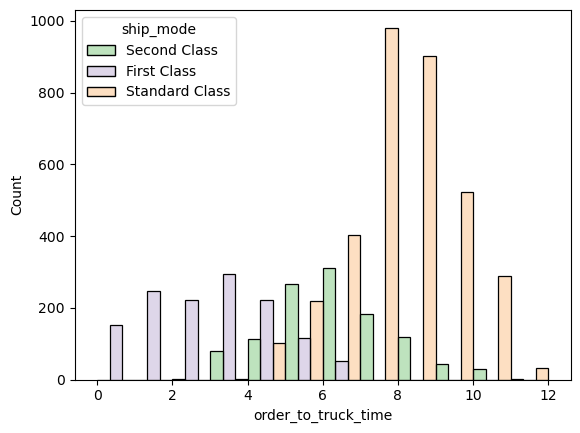

In [98]:
## plot distribution of "order to truck time" split by ship mode

sns.histplot(x='order_to_truck_time', data=all_data, hue='ship_mode',
            multiple='dodge',alpha=0.5, palette='Accent', bins=12);

/Users/Dom/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/Dom/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/Dom/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


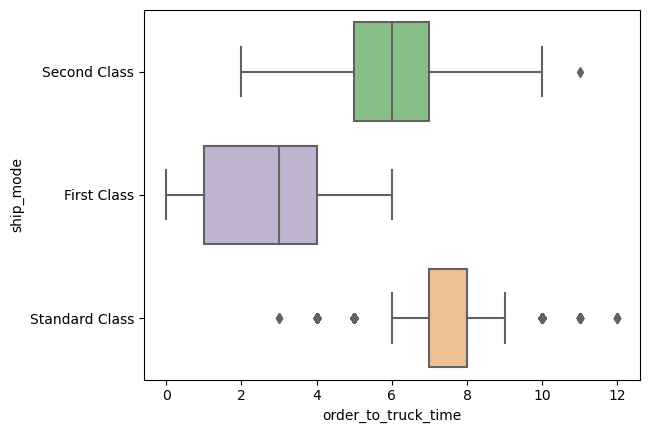

In [58]:
sns.boxplot(data=all_data, x='order_to_truck_time', y='ship_mode', palette='Accent');

/Users/Dom/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/Dom/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/Dom/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/Dom/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) inst

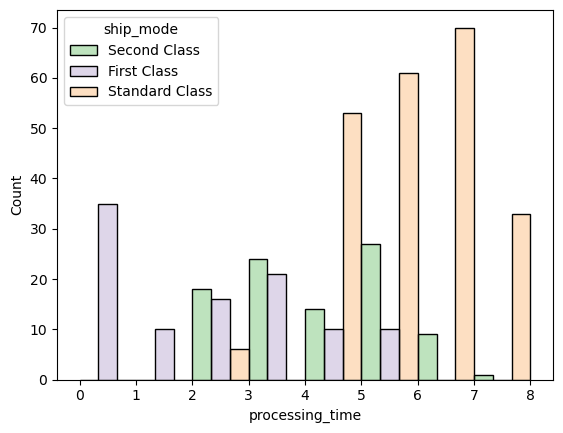

In [97]:
## plot distribution of "processing days" split by ship mode

sns.histplot(x='processing_time', data=all_data, hue='ship_mode',
             multiple='dodge',alpha=0.5, palette='Accent', bins=8);

/Users/Dom/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/Dom/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/Dom/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


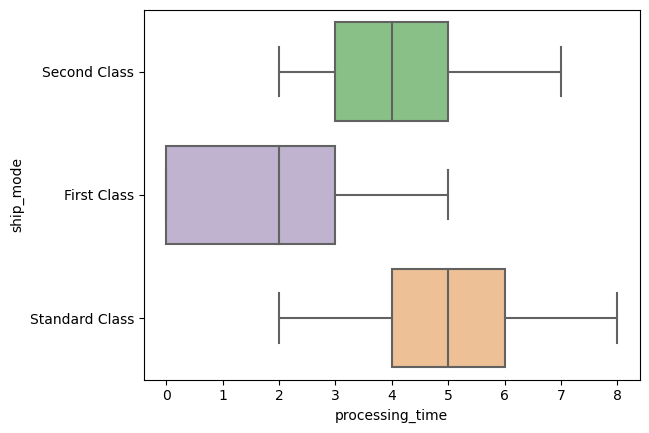

In [60]:
sns.boxplot(data=all_data, x='processing_time', y='ship_mode', palette='Accent');

/Users/Dom/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/Dom/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/Dom/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/Dom/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) inst

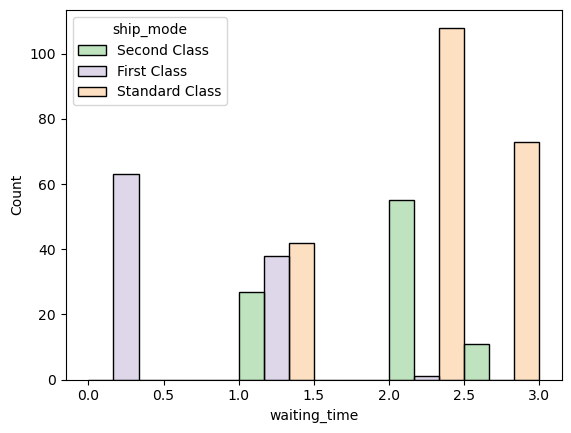

In [96]:
## plot distribution of "waiting time" split by ship mode

sns.histplot(x='waiting_time', data=all_data, hue='ship_mode',
            multiple='dodge',alpha=0.5, palette='Accent', bins=6);

/Users/Dom/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/Dom/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/Dom/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


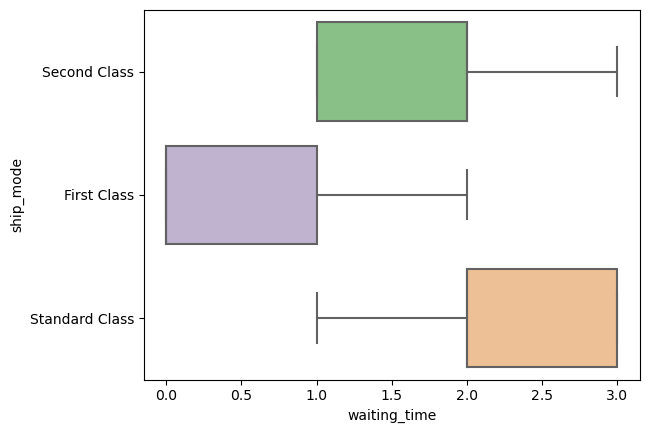

In [62]:
sns.boxplot(data=all_data, x='waiting_time', y='ship_mode', palette='Accent');

### Does arregating by order_id make a difference to the above... ???

In [63]:
all_data.head()

,order_id,order_date,ship_mode,processing_mode,rdy2ship_date,pickup_date,customer_id,customer_name,on_truck_scan_date,arrival_scan_date,...,category,sub_category,product_id,sales,quantity,discount,profit,order_to_truck_time,processing_time,waiting_time
0,CA-2019-121755,2019-01-16,Second Class,Standard Processing,NaT,NaT,EH-13945,Eric Hoffmann,2019-01-23,NaT,...,Special Projects Muesil,Gluten Free,TEC-AC-10003027,90.570,3,0.0,11.7741,7.0,NaN,NaN
2,CA-2019-121755,2019-01-16,Second Class,Standard Processing,NaT,NaT,EH-13945,Eric Hoffmann,2019-01-23,NaT,...,Power Muesli,Super Fibre Boost,OFF-BI-10001634,11.648,2,0.2,4.2224,7.0,NaN,NaN
4,CA-2019-118255,2019-03-11,First Class,Express,NaT,NaT,ON-18715,Odella Nelson,2019-03-13,NaT,...,Special Projects Muesil,Gluten Free,TEC-AC-10000171,45.980,2,0.0,19.7714,2.0,NaN,NaN
6,CA-2019-118255,2019-03-11,First Class,Express,NaT,NaT,ON-18715,Odella Nelson,2019-03-13,NaT,...,Power Muesli,Super Fibre Boost,OFF-BI-10003291,17.460,2,0.0,8.2062,2.0,NaN,NaN
8,CA-2019-169194,2019-06-20,Standard Class,Standard Processing,NaT,NaT,LH-16900,Lena Hernandez,2019-06-26,NaT,...,Special Projects Muesil,Gluten Free,TEC-AC-10002167,45.000,3,0.0,4.9500,6.0,NaN,NaN


In [64]:
def join_with_commas(series):
    return ', '.join(series)

In [65]:
agg_dict = {
    'category': join_with_commas,
    'sub_category': join_with_commas,
    'product_id': join_with_commas,  
    'sales': 'sum',
    'quantity': 'sum',
    'discount':'sum',
    'profit': 'sum'
    
}

agg_df = all_data.groupby('order_id').agg(agg_dict).reset_index()

agg_df.head()

,order_id,category,sub_category,product_id,sales,quantity,discount,profit
0,CA-2017-100006,Special Projects Muesil,Only Oats,TEC-PH-10002075,377.970,3,0.0,109.6113
1,CA-2017-100090,"Power Muesli, Toasted Muesli","Super Fibre Boost, Sweetened","OFF-BI-10001597, FUR-TA-10003715",699.192,9,0.4,-19.0890
2,CA-2017-100293,Power Muesli,Nuts and more,OFF-PA-10000176,91.056,6,0.2,31.8696
3,CA-2017-100328,Power Muesli,Super Fibre Boost,OFF-BI-10000343,3.928,1,0.2,1.3257
4,CA-2017-100363,"Power Muesli, Power Muesli","Maple Sweetened, Nuts and more","OFF-FA-10000611, OFF-PA-10004733",21.376,5,0.4,7.7192


In [66]:
agg_orders = pd.merge(all_data, agg_df, on='order_id')
agg_orders.head()

,order_id,order_date,ship_mode,processing_mode,rdy2ship_date,pickup_date,customer_id,customer_name,on_truck_scan_date,arrival_scan_date,...,order_to_truck_time,processing_time,waiting_time,category_y,sub_category_y,product_id_y,sales_y,quantity_y,discount_y,profit_y
0,CA-2019-121755,2019-01-16,Second Class,Standard Processing,NaT,NaT,EH-13945,Eric Hoffmann,2019-01-23,NaT,...,7.0,NaN,NaN,"Special Projects Muesil, Power Muesli","Gluten Free, Super Fibre Boost","TEC-AC-10003027, OFF-BI-10001634",102.218,5,0.2,15.9965
1,CA-2019-121755,2019-01-16,Second Class,Standard Processing,NaT,NaT,EH-13945,Eric Hoffmann,2019-01-23,NaT,...,7.0,NaN,NaN,"Special Projects Muesil, Power Muesli","Gluten Free, Super Fibre Boost","TEC-AC-10003027, OFF-BI-10001634",102.218,5,0.2,15.9965
2,CA-2019-118255,2019-03-11,First Class,Express,NaT,NaT,ON-18715,Odella Nelson,2019-03-13,NaT,...,2.0,NaN,NaN,"Special Projects Muesil, Power Muesli","Gluten Free, Super Fibre Boost","TEC-AC-10000171, OFF-BI-10003291",63.440,4,0.0,27.9776
3,CA-2019-118255,2019-03-11,First Class,Express,NaT,NaT,ON-18715,Odella Nelson,2019-03-13,NaT,...,2.0,NaN,NaN,"Special Projects Muesil, Power Muesli","Gluten Free, Super Fibre Boost","TEC-AC-10000171, OFF-BI-10003291",63.440,4,0.0,27.9776
4,CA-2019-169194,2019-06-20,Standard Class,Standard Processing,NaT,NaT,LH-16900,Lena Hernandez,2019-06-26,NaT,...,6.0,NaN,NaN,"Special Projects Muesil, Special Projects Muesil","Gluten Free, Only Oats","TEC-AC-10002167, TEC-PH-10003988",66.800,5,0.0,11.0540


In [67]:
all_data.head()

,order_id,order_date,ship_mode,processing_mode,rdy2ship_date,pickup_date,customer_id,customer_name,on_truck_scan_date,arrival_scan_date,...,category,sub_category,product_id,sales,quantity,discount,profit,order_to_truck_time,processing_time,waiting_time
0,CA-2019-121755,2019-01-16,Second Class,Standard Processing,NaT,NaT,EH-13945,Eric Hoffmann,2019-01-23,NaT,...,Special Projects Muesil,Gluten Free,TEC-AC-10003027,90.570,3,0.0,11.7741,7.0,NaN,NaN
2,CA-2019-121755,2019-01-16,Second Class,Standard Processing,NaT,NaT,EH-13945,Eric Hoffmann,2019-01-23,NaT,...,Power Muesli,Super Fibre Boost,OFF-BI-10001634,11.648,2,0.2,4.2224,7.0,NaN,NaN
4,CA-2019-118255,2019-03-11,First Class,Express,NaT,NaT,ON-18715,Odella Nelson,2019-03-13,NaT,...,Special Projects Muesil,Gluten Free,TEC-AC-10000171,45.980,2,0.0,19.7714,2.0,NaN,NaN
6,CA-2019-118255,2019-03-11,First Class,Express,NaT,NaT,ON-18715,Odella Nelson,2019-03-13,NaT,...,Power Muesli,Super Fibre Boost,OFF-BI-10003291,17.460,2,0.0,8.2062,2.0,NaN,NaN
8,CA-2019-169194,2019-06-20,Standard Class,Standard Processing,NaT,NaT,LH-16900,Lena Hernandez,2019-06-26,NaT,...,Special Projects Muesil,Gluten Free,TEC-AC-10002167,45.000,3,0.0,4.9500,6.0,NaN,NaN


In [68]:
agg_orders.shape

(9995, 33)

In [69]:
agg_orders.columns

Index(['order_id', 'order_date', 'ship_mode', 'processing_mode',
       'rdy2ship_date', 'pickup_date', 'customer_id', 'customer_name',
       'on_truck_scan_date', 'arrival_scan_date', 'origin_channel',
       'country/region', 'city', 'state', 'postal_code', 'region',
       'category_x', 'sub_category_x', 'product_id_x', 'sales_x', 'quantity_x',
       'discount_x', 'profit_x', 'order_to_truck_time', 'processing_time',
       'waiting_time', 'category_y', 'sub_category_y', 'product_id_y',
       'sales_y', 'quantity_y', 'discount_y', 'profit_y'],
      dtype='object')

In [70]:
agg_orders = agg_orders[['order_id', 'order_date', 'ship_mode', 'processing_mode', 'rdy2ship_date', 
                             'pickup_date', 'customer_id', 'customer_name',
                             'on_truck_scan_date','arrival_scan_date','origin_channel',
                             'country/region', 'city', 'state', 'postal_code','region',
                             'category_y', 'sub_category_y', 'product_id_y', 'quantity_y',
                             'sales_y', 'discount_y', 'profit_y',
                             'order_to_truck_time', 'processing_time',
                             'waiting_time',]]

In [71]:
agg_orders.rename(columns={'category_y':'categories',
                           'sub_category_y':'sub_categories',
                           'product_id_y':'product_ids',
                           'quantity_y':'quantity_ttl',
                           'sales_y':'sales_ttl',
                           'discount_y':'discount_ttl',
                           'profit_y':'profit_ttl'
                         },inplace=True)

In [72]:
agg_orders.duplicated().sum()

4985

In [73]:
agg_orders.drop_duplicates(inplace=True)

In [74]:
agg_orders.dtypes

order_id                       object
order_date             datetime64[ns]
ship_mode                      object
processing_mode                object
rdy2ship_date          datetime64[ns]
pickup_date            datetime64[ns]
customer_id                    object
customer_name                  object
on_truck_scan_date     datetime64[ns]
arrival_scan_date      datetime64[ns]
origin_channel                 object
country/region                 object
city                           object
state                          object
postal_code                   float64
region                         object
categories                     object
sub_categories                 object
product_ids                    object
quantity_ttl                    int64
sales_ttl                     float64
discount_ttl                  float64
profit_ttl                    float64
order_to_truck_time           float64
processing_time               float64
waiting_time                  float64
dtype: objec

In [99]:
agg_orders.to_csv('../data/merged_agg_muesli.csv', index=False)

/Users/Dom/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/Dom/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/Dom/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/Dom/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) inst

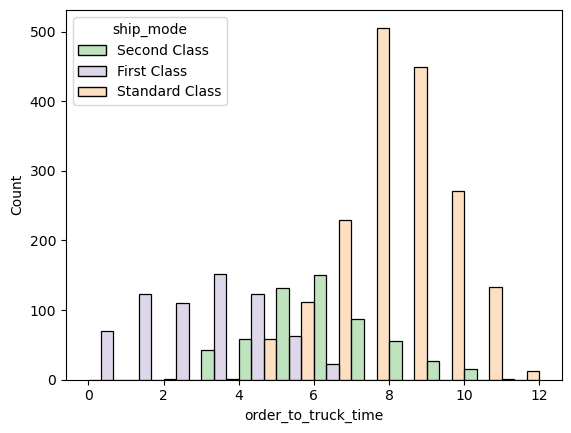

In [93]:
sns.histplot(x='order_to_truck_time', data=agg_orders, hue='ship_mode',
            multiple='dodge',alpha=0.5, palette='Accent', bins=12);

/Users/Dom/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/Dom/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/Dom/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


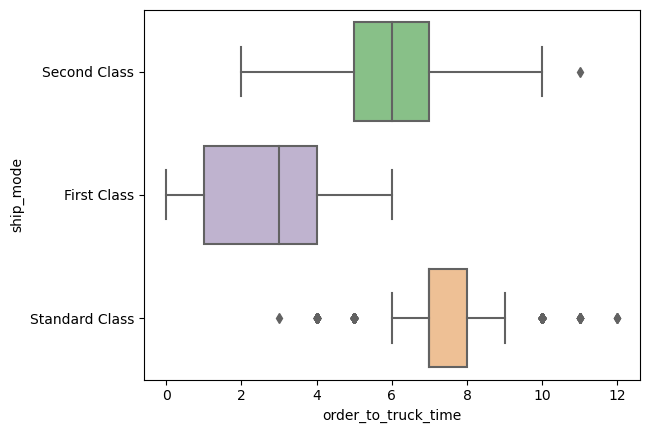

In [77]:
sns.boxplot(data=agg_orders, x='order_to_truck_time', y='ship_mode', palette='Accent');

/Users/Dom/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/Dom/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/Dom/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/Dom/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) inst

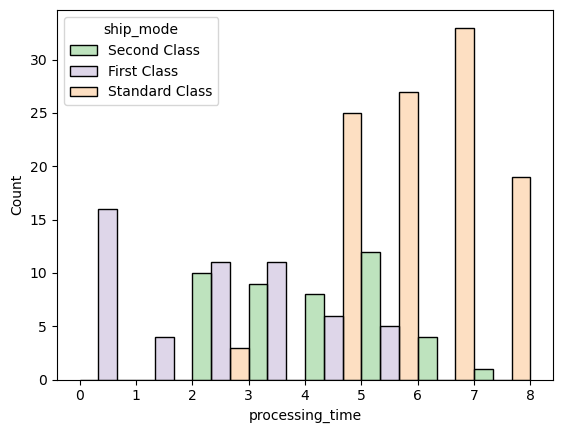

In [89]:
## plot distribution of "processing days" split by ship mode

sns.histplot(x='processing_time', data=agg_orders, hue='ship_mode',
             multiple='dodge',alpha=0.5, palette='Accent', bins=8);

/Users/Dom/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/Dom/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/Dom/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


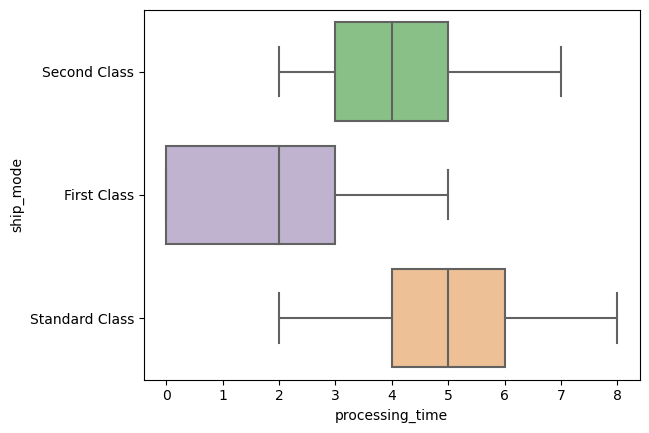

In [79]:
sns.boxplot(data=agg_orders, x='processing_time', y='ship_mode', palette='Accent');

/Users/Dom/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/Dom/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/Dom/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/Dom/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) inst

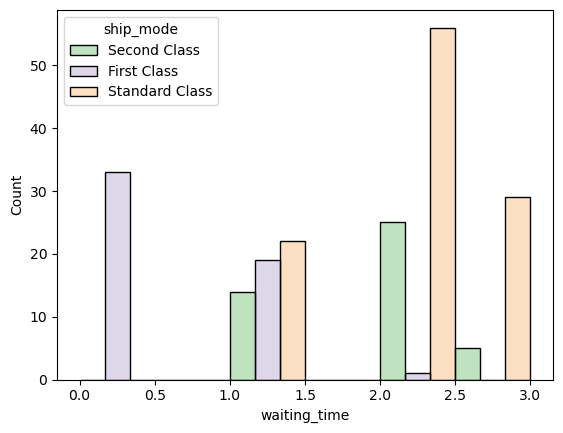

In [86]:
## plot distribution of "waiting time" split by ship mode

sns.histplot(x='waiting_time', data=agg_orders, hue='ship_mode',
            multiple='dodge',alpha=0.5, palette='Accent', bins=6);

/Users/Dom/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/Dom/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/Dom/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


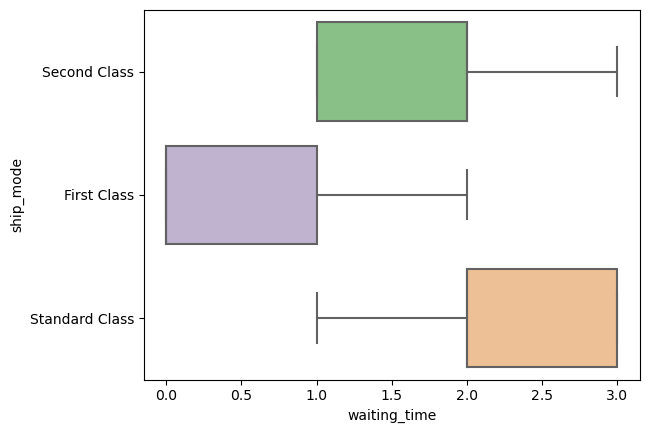

In [81]:
sns.boxplot(data=agg_orders, x='waiting_time', y='ship_mode', palette='Accent');